# Multi-Layer Perceptron, MNIST
---
In this notebook, we will train an MLP to classify images from the [MNIST database](http://yann.lecun.com/exdb/mnist/) hand-written digit database.

The process will be broken down into the following steps:
>1. Load and visualize the data
2. Define a neural network
3. Train the model
4. Evaluate the performance of our trained model on a test dataset!

Before we begin, we have to import the necessary libraries for working with data and PyTorch.

In [19]:
# import libraries
import torch
import numpy as np
import random

---
## Load and Visualize the [Data](http://pytorch.org/docs/stable/torchvision/datasets.html)

Downloading may take a few moments, and you should see your progress as the data is loading. You may also choose to change the `batch_size` if you want to load more data at a time.

This cell will create DataLoaders for each of our datasets.

In [2]:
from torchvision import datasets
import torchvision.transforms as transforms
from torch.utils.data.sampler import SubsetRandomSampler

# number of subprocesses to use for data loading
num_workers = 0
# how many samples per batch to load
batch_size = 20
# percentage of training set to use as validation
valid_size = 0.2

# convert data to torch.FloatTensor
transform = transforms.ToTensor()

# choose the training and test datasets
train_data = datasets.MNIST(root='data', train=True,
                                   download=True, transform=transform)
test_data = datasets.MNIST(root='data', train=False,
                                  download=True, transform=transform)

# obtain training indices that will be used for validation
num_train = len(train_data)
indices = list(range(num_train))
np.random.shuffle(indices)
split = int(np.floor(valid_size * num_train))
train_idx, valid_idx = indices[split:], indices[:split]

# define samplers for obtaining training and validation batches
train_sampler = SubsetRandomSampler(train_idx)
valid_sampler = SubsetRandomSampler(valid_idx)

# prepare data loaders
train_loader = torch.utils.data.DataLoader(train_data, batch_size=batch_size,
    sampler=train_sampler, num_workers=num_workers)
valid_loader = torch.utils.data.DataLoader(train_data, batch_size=batch_size, 
    sampler=valid_sampler, num_workers=num_workers)
test_loader = torch.utils.data.DataLoader(test_data, batch_size=batch_size, 
    num_workers=num_workers)

Processing...
Done!


In [71]:
print(num_train, '\n',  split, '\n', train_idx, '\n',valid_idx)

60000 
 12000 


 [29699, 20265, 24399, 41589, 18136, 15803, 43208, 4669, 28148, 29923, 23329, 19112, 57655, 27296, 9402, 28871, 54549, 52408, 50298, 44566, 5318, 20065, 55684, 26099, 21015, 46927, 32475, 24950, 12284, 13449, 294, 48282, 7299, 20419, 11850, 41858, 37520, 17604, 45490, 40551, 54788, 35645, 1400, 38945, 5127, 33796, 43819, 58164, 6763, 10079, 16301, 8556, 10465, 33100, 5306, 38718, 56827, 8155, 49007, 44724, 43954, 55700, 38807, 56371, 7513, 8183, 19435, 42126, 30841, 11749, 6791, 6094, 16332, 46031, 26210, 41762, 30057, 32377, 47420, 20637, 5484, 7343, 37573, 19745, 49301, 33308, 48882, 13916, 40928, 25541, 17640, 52999, 23730, 34051, 49507, 43171, 27195, 21972, 14405, 59169, 2965, 53388, 53192, 46144, 53516, 52503, 10058, 45891, 47728, 18755, 23893, 2801, 23274, 15473, 49626, 8427, 29214, 9985, 40316, 16665, 47536, 26985, 14236, 58487, 59437, 13090, 56978, 54988, 20616, 31785, 49981, 58250, 5494, 11406, 6182, 36962, 9178, 8709, 54910, 54263, 33991, 55097, 35333, 48106, 40044, 19221, 24

 [25411, 28583, 28172, 54482, 24004, 44551, 52215, 17848, 42186, 1640, 58138, 52317, 37030, 20596, 38924, 6156, 25769, 40352, 38439, 32840, 34632, 815, 3167, 32919, 57206, 33993, 43986, 23904, 11009, 28570, 51891, 28370, 48224, 7199, 13950, 34995, 27893, 26609, 13754, 55871, 31632, 1456, 28436, 15556, 1986, 48260, 59509, 41128, 15571, 10252, 56272, 9156, 14497, 16969, 46796, 30479, 42562, 47797, 4031, 18371, 41896, 7025, 25276, 34000, 45266, 24146, 41334, 36298, 14579, 16134, 33596, 12571, 50335, 18593, 4806, 46517, 25111, 40672, 59155, 59445, 19046, 30607, 57133, 27336, 4718, 45781, 6474, 44524, 8750, 36371, 42174, 40346, 22584, 11460, 8129, 9871, 46965, 17813, 17997, 38095, 1378, 30842, 5790, 26502, 58053, 47933, 36596, 33157, 2454, 55035, 51453, 34015, 5045, 53849, 12247, 57892, 32846, 34718, 54791, 52267, 39276, 57516, 31891, 46176, 11886, 57132, 39731, 34608, 47711, 54595, 33666, 49660, 23551, 5524, 19186, 22044, 30064, 52615, 24966, 49701, 11535, 26119, 8037, 1820, 25030, 53610, 

### Visualize a Batch of Training Data

The first step in a classification task is to take a look at the data, make sure it is loaded in correctly, then make any initial observations about patterns in that data.

(1, 28, 28)
(28, 28)
(1, 28, 28)
(28, 28)
(1, 28, 28)
(28, 28)
(1, 28, 28)
(28, 28)
(1, 28, 28)
(28, 28)
(1, 28, 28)
(28, 28)
(1, 28, 28)
(28, 28)
(1, 28, 28)
(28, 28)
(1, 28, 28)
(28, 28)
(1, 28, 28)
(28, 28)
(1, 28, 28)
(28, 28)
(1, 28, 28)
(28, 28)
(1, 28, 28)
(28, 28)
(1, 28, 28)
(28, 28)
(1, 28, 28)
(28, 28)
(1, 28, 28)
(28, 28)
(1, 28, 28)
(28, 28)
(1, 28, 28)
(28, 28)
(1, 28, 28)
(28, 28)
(1, 28, 28)
(28, 28)


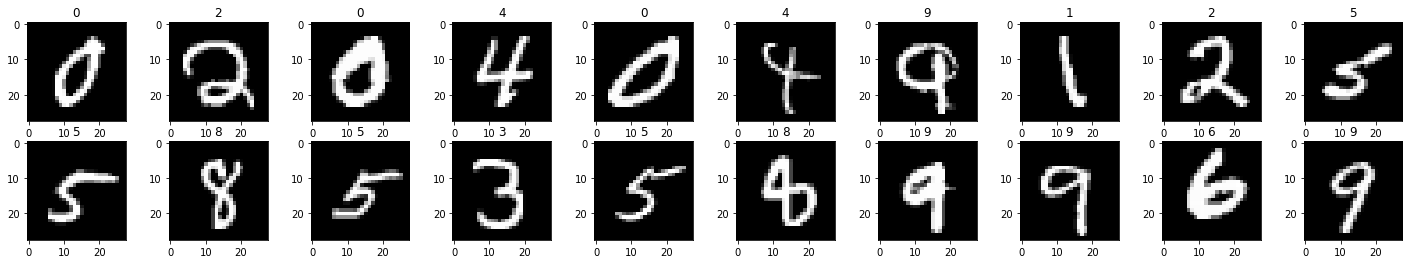

In [75]:
import matplotlib.pyplot as plt
%matplotlib inline
    
# obtain one batch of training images
dataiter = iter(train_loader)
images, labels = dataiter.next()
images = images.numpy()

# plot the images in the batch, along with the corresponding labels
fig = plt.figure(figsize=(25, 4))
for idx in np.arange(20):
    ax = fig.add_subplot(2, 20/2, idx+1, xticks=[], yticks=[])
    print(images[idx].shape)
    print(np.squeeze(images[idx]).shape)
    ax.imshow(np.squeeze(images[idx]), cmap='gray')
    # print out the correct label for each image
    # .item() gets the value contained in a Tensor
    ax.set_title(str(labels[idx].item()))

### View an Image in More Detail

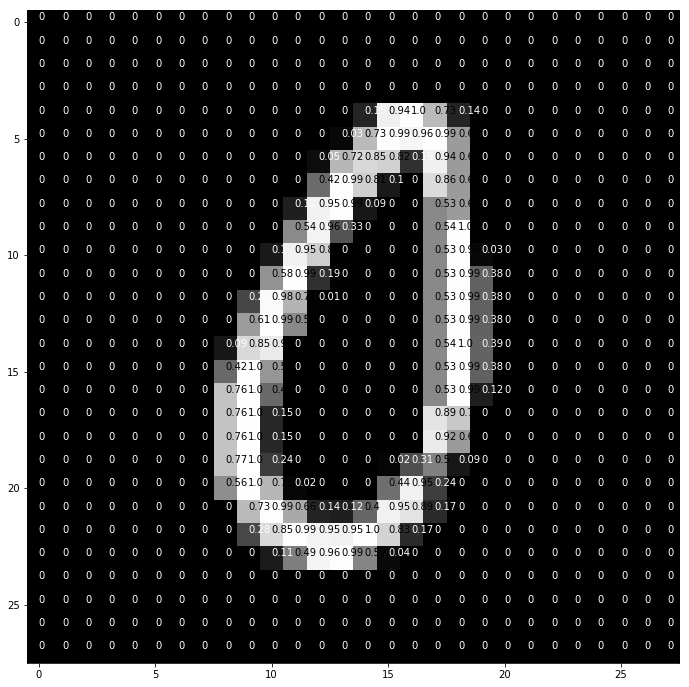

In [49]:
# We call squeeze method to drop the color channel from the images tensor, whose shape is (1,28,28) and changes to (28, 28)
img = np.squeeze(random.choice(images))

fig = plt.figure(figsize = (12, 12)) 
ax = fig.add_subplot(111)
ax.imshow(img, cmap='gray')
width, height = img.shape
thresh = img.max()/2.5
for x in range(width):
    for y in range(height):
        val = round(img[x][y],2) if img[x][y] !=0 else 0
        ax.annotate(str(val), xy=(y,x),
                    horizontalalignment='center',
                    verticalalignment='center',
                    color='white' if img[x][y]<thresh else 'black')

---
## Define the Network [Architecture](http://pytorch.org/docs/stable/nn.html)

The architecture will be responsible for seeing as input a 784-dim Tensor of pixel values for each image, and producing a Tensor of length 10 (our number of classes) that indicates the class scores for an input image. This particular example uses two hidden layers and dropout to avoid overfitting.

In [50]:
import torch.nn as nn
import torch.nn.functional as F

# define the NN architecture
class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        # number of hidden nodes in each layer (512)
        hidden_1 = 512
        hidden_2 = 512
        # linear layer (784 -> hidden_1)
        self.fc1 = nn.Linear(28 * 28, hidden_1)
        # linear layer (n_hidden -> hidden_2)
        self.fc2 = nn.Linear(hidden_1, hidden_2)
        # linear layer (n_hidden -> 10)
        self.fc3 = nn.Linear(hidden_2, 10)
        # dropout layer (p=0.2)
        # dropout prevents overfitting of data
        self.dropout = nn.Dropout(0.2)

    def forward(self, x):
        # flatten image input
        x = x.view(-1, 28 * 28)
        # add hidden layer, with relu activation function
        x = F.relu(self.fc1(x))
        # add dropout layer
        x = self.dropout(x)
        # add hidden layer, with relu activation function
        x = F.relu(self.fc2(x))
        # add dropout layer
        x = self.dropout(x)
        # add output layer
        x = self.fc3(x)
        return x

# initialize the NN
model = Net()
print(model)

Net(
  (fc1): Linear(in_features=784, out_features=512, bias=True)
  (fc2): Linear(in_features=512, out_features=512, bias=True)
  (fc3): Linear(in_features=512, out_features=10, bias=True)
  (dropout): Dropout(p=0.2)
)


###  Specify [Loss Function](http://pytorch.org/docs/stable/nn.html#loss-functions) and [Optimizer](http://pytorch.org/docs/stable/optim.html)

It's recommended that you use cross-entropy loss for classification. If you look at the documentation (linked above), you can see that PyTorch's cross entropy function applies a softmax funtion to the output layer *and* then calculates the log loss.

In [123]:
# specify loss function (categorical cross-entropy)
criterion = nn.CrossEntropyLoss()

# specify optimizer (stochastic gradient descent) and learning rate = 0.01
optimizer = torch.optim.SGD(model.parameters(), lr=0.01)

---
## Train the Network

The steps for training/learning from a batch of data are described in the comments below:
1. Clear the gradients of all optimized variables
2. Forward pass: compute predicted outputs by passing inputs to the model
3. Calculate the loss
4. Backward pass: compute gradient of the loss with respect to model parameters
5. Perform a single optimization step (parameter update)
6. Update average training loss

The following loop trains for 50 epochs; take a look at how the values for the training loss decrease over time. We want it to decrease while also avoiding overfitting the training data.

In [52]:
# number of epochs to train the model
n_epochs = 50

# initialize tracker for minimum validation loss
valid_loss_min = np.Inf # set initial "min" to infinity

for epoch in range(n_epochs):
    # monitor training loss
    train_loss = 0.0
    valid_loss = 0.0
    
    ###################
    # train the model #
    ###################
    model.train() # prep model for training
    for data, target in train_loader:
        # clear the gradients of all optimized variables
        optimizer.zero_grad()
        # forward pass: compute predicted outputs by passing inputs to the model
        output = model(data)
        # calculate the loss
        loss = criterion(output, target)
        # backward pass: compute gradient of the loss with respect to model parameters
        loss.backward()
        # perform a single optimization step (parameter update)
        optimizer.step()
        # update running validation loss. . we multiply by batch size because nn.CrossEntropyLoss returns average loss by default
        train_loss += loss.item()*data.size(0)
        
    ######################    
    # validate the model #
    ######################
    model.eval() # prep model for evaluation
    for data, target in valid_loader:
        # forward pass: compute predicted outputs by passing inputs to the model
        output = model(data)
        # calculate the loss
        loss = criterion(output, target)
        # update running validation loss. . we multiply by batch size because nn.CrossEntropyLoss returns average loss by default
        valid_loss += loss.item()*data.size(0)
        
    # print training/validation statistics 
    # calculate average loss over an epoch
    train_loss = train_loss/len(train_loader.dataset)
    valid_loss = valid_loss/len(valid_loader.dataset)
    
    print('Epoch: {} \tTraining Loss: {:.6f} \tValidation Loss: {:.6f}'.format(
        epoch+1, 
        train_loss,
        valid_loss
        ))
    
    # save model if validation loss has decreased
    if valid_loss <= valid_loss_min:
        print('Validation loss decreased ({:.6f} --> {:.6f}).  Saving model ...'.format(
        valid_loss_min,
        valid_loss))
        torch.save(model.state_dict(), 'model.pt')
        valid_loss_min = valid_loss

Epoch: 1 	Training Loss: 0.762239 	Validation Loss: 0.075269
Validation loss decreased (inf --> 0.075269).  Saving model ...
Epoch: 2 	Training Loss: 0.286387 	Validation Loss: 0.056801
Validation loss decreased (0.075269 --> 0.056801).  Saving model ...
Epoch: 3 	Training Loss: 0.225245 	Validation Loss: 0.046618
Validation loss decreased (0.056801 --> 0.046618).  Saving model ...
Epoch: 4 	Training Loss: 0.186550 	Validation Loss: 0.038901
Validation loss decreased (0.046618 --> 0.038901).  Saving model ...
Epoch: 5 	Training Loss: 0.157518 	Validation Loss: 0.034215
Validation loss decreased (0.038901 --> 0.034215).  Saving model ...
Epoch: 6 	Training Loss: 0.135776 	Validation Loss: 0.030003
Validation loss decreased (0.034215 --> 0.030003).  Saving model ...
Epoch: 7 	Training Loss: 0.118813 	Validation Loss: 0.026929
Validation loss decreased (0.030003 --> 0.026929).  Saving model ...
Epoch: 8 	Training Loss: 0.107473 	Validation Loss: 0.024854
Validation loss decreased (0.02692

In [82]:
print(train_loader.dataset, '\n')
print(valid_loader.dataset)

Dataset MNIST
    Number of datapoints: 60000
    Split: train
    Root Location: data
    Transforms (if any): ToTensor()
    Target Transforms (if any): None 

Dataset MNIST
    Number of datapoints: 60000
    Split: train
    Root Location: data
    Transforms (if any): ToTensor()
    Target Transforms (if any): None


###  Load the Model with the Lowest Validation Loss

In [83]:
model.load_state_dict(torch.load('model.pt'))

---
## Test the Trained Network

Finally, we test our best model on previously unseen **test data** and evaluate it's performance. Testing on unseen data is a good way to check that our model generalizes well. It may also be useful to be granular in this analysis and take a look at how this model performs on each class as well as looking at its overall loss and accuracy.

In [127]:
# initialize lists to monitor test loss and accuracy
test_loss = 0.0
class_correct = list(0. for i in range(10))
class_total = list(0. for i in range(10))

model.eval() # prep model for evaluation

for data, target in test_loader:
    # forward pass: compute predicted outputs by passing inputs to the model
    output = model(data)
    # calculate the loss
    loss = criterion(output, target)
    # update test loss. we multiply by batch size because nn.CrossEntropyLoss returns average loss by default
    test_loss += loss.item()*data.size(0)
    # convert output probabilities to predicted class
    _, pred = torch.max(output, 1)
    # compare predictions to true label
    correct = np.squeeze(pred.eq(target.view_as(pred)))
    # calculate test accuracy for each object class
    for i in range(batch_size):
        label = target[i]
        class_correct[label] += correct[i].item()
        class_total[label] += 1

# calculate and print avg test loss
test_loss = test_loss/len(test_loader.dataset)
print('Test Loss: {:.6f}\n'.format(test_loss))

for i in range(10):
    if class_total[i] > 0:
        print('Test Accuracy of %5s: %2d%% (%2d/%2d)' % (
            str(i), 100 * class_correct[i] / class_total[i],
            np.sum(class_correct[i]), np.sum(class_total[i])))
    else:
        print('Test Accuracy of %5s: N/A (no training examples)' % (classes[i]))

print('\nTest Accuracy (Overall): %2d%% (%2d/%2d)' % (
    100. * np.sum(class_correct) / np.sum(class_total),
    np.sum(class_correct), np.sum(class_total)))

Test Loss: 0.060625

Test Accuracy of     0: 99% (973/980)
Test Accuracy of     1: 99% (1124/1135)
Test Accuracy of     2: 97% (1006/1032)
Test Accuracy of     3: 98% (997/1010)
Test Accuracy of     4: 97% (962/982)
Test Accuracy of     5: 97% (874/892)
Test Accuracy of     6: 97% (936/958)
Test Accuracy of     7: 97% (1003/1028)
Test Accuracy of     8: 98% (955/974)
Test Accuracy of     9: 97% (987/1009)

Test Accuracy (Overall): 98% (9817/10000)


### Visualize Sample Test Results

This cell displays test images and their labels in this format: `predicted (ground-truth)`. The text will be green for accurately classified examples and red for incorrect predictions.

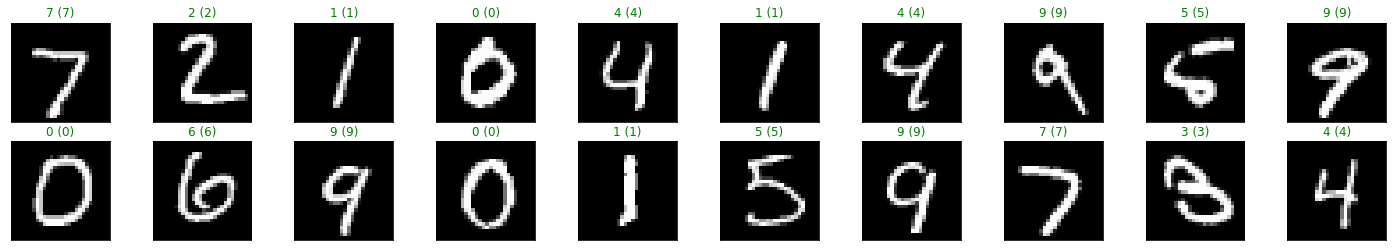

In [167]:
# obtain one batch of test images
dataiter = iter(test_loader)
images, labels = dataiter.next()

# get sample outputs
output = model(images)
# convert output probabilities to predicted class
_, preds = torch.max(output, 1)
# prep images for display
images = images.numpy()

# plot the images in the batch, along with predicted and true labels
fig = plt.figure(figsize=(25, 4))
for idx in np.arange(20):
    ax = fig.add_subplot(2, 20/2, idx+1, xticks=[], yticks=[])
    ax.imshow(np.squeeze(images[idx]), cmap='gray')
    ax.set_title("{} ({})".format(str(preds[idx].item()), str(labels[idx].item())),
                 color=("green" if preds[idx]==labels[idx] else "red"))